In [5]:
import pandas as pd

In [6]:
# https://www.kaggle.com/datasets/aashita/nyt-comments?select=ArticlesApril2018.csv
df = pd.read_csv('ArticlesApril2018.csv', encoding='latin1')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleadersâ Settlement Offer...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"âI understand that they could meet with us, ...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,Whatâs it like to eat at the second incarnat...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Torontoâs ...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


2. 데이터 전처리
- headline column만 사용 

In [7]:
# 결측지 개수 확인 
df.headline.isna().sum()

0

In [8]:
# headline 값 리스트로 
headlines = df.headline.values.tolist()

In [9]:
# 확인 
headlines[:5]

['Former N.F.L. Cheerleadersâ\x80\x99 Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [10]:
# 전체 데이터 개수 확인 
len(headlines)

1324

In [11]:
# 노이즈 데이터 ('Unknown') 제거
headlines = [line for line in df.headline.values if line !='Unknown']
len(headlines)

1214

In [12]:
# encoding, 구둣점 제거, 소문자로 변환 
import re
def preprocessing(s):
  s = s.encode('utf8').decode('ascii', 'ignore') # 이상한 데이터 없애기 위해 encode->decode
  s = re.sub('[^A-Za-z0-9 ]', '', s)             # 구둣점 제거 
  return s.lower()                               # 소문자로 변경 

In [13]:
headlines = [preprocessing(line) for line in headlines] 
headlines[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [14]:
"""
['Former N.F.L. Cheerleadersâ\x80\x99 Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

 ===>  (After preprocessing)

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']
 """

"\n['Former N.F.L. Cheerleadersâ\x80\x99 Settlement Offer: $1 and a Meeting With Goodell',\n 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',\n 'The New Noma, Explained',\n 'Unknown',\n 'Unknown']\n\n ===>  (After preprocessing)\n\n['former nfl cheerleaders settlement offer 1 and a meeting with goodell',\n 'epa to unveil a new rule its effect less science in policymaking',\n 'the new noma explained',\n 'how a bag of texas dirt  became a times tradition',\n 'is school a place for selfexpression']\n "

### `Keras` text preprocessing

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [16]:
# 단어 집합 생성 
t = Tokenizer()
t.fit_on_texts(headlines)

In [17]:
# 단어 집합 크기 - Keras Toeknizer의 시작 인덱스가 1이기 때문에 1을 더해주어야 함 
vocab_size = len(t.word_index) + 1
vocab_size

3494

In [18]:
# 라인별 sequences 생성 
sequences = []
for line in headlines:
  encoded = t.texts_to_sequences([line])[0]
  for i in range(1, len(encoded)):
    sequences.append(encoded[:i+1])

# 10개만 확인
sequences[:10]  

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116]]

In [19]:
# sequence 중 제일 길이가 긴 것 
max_len = max(len(seq) for seq in sequences)
max_len

24

In [20]:
# Padding
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          99,  269],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   99,
         269,  371],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   99,  269,
         371, 1115]], dtype=int32)

In [21]:
# X, Y data 설정 
X = sequences[:, :-1]

y = sequences[:, -1]
Y = to_categorical(y)

X.shape, y.shape, Y.shape

((7803, 23), (7803,), (7803, 3494))

### Define the Model


#### case 1: `LSTM`
- Embedding vector num: 10
- LSTM unit num: 128

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [24]:
# vocab_size = 3494
model = Sequential([
                    Embedding(vocab_size, 10, input_length=max_len-1),
                    LSTM(128),
                    Dense(vocab_size, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 10)            34940     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 3494)              450726    
                                                                 
Total params: 556,834
Trainable params: 556,834
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [26]:
%time hist = model.fit(X, Y, epochs=200, verbose=0)

CPU times: user 5min 4s, sys: 31 s, total: 5min 35s
Wall time: 4min 20s


In [27]:
hist.history['accuracy'][-1] 

0.9158016443252563

- Validation

In [ ]:
from google.colab import files
up = files.upload()
# my_util.py 파일 업로드 하기!

In [28]:
from my_util import sentence_generation
print(sentence_generation(model, t, max_len, 'former', 8) )
print(sentence_generation(model, t, max_len, 'epa', 8) )
print(sentence_generation(model, t, max_len, 'how', 8) )

former cheney aide is pardoned by trump in cia
epa to unveil a new rule its effect less
how to make facebook more accountable to deploy national


In [ ]:
"""
(After preprocessing)
['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']
"""

- Plotting the history of the training of the model

In [30]:
y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
xs = np.arange(1, len(y_acc)+1)

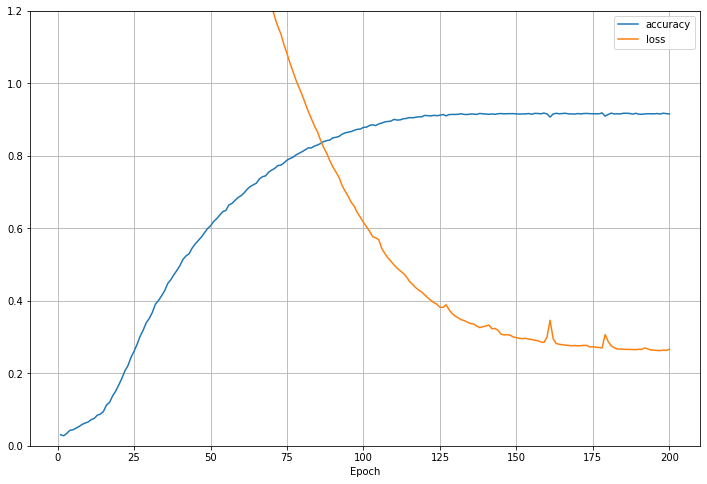

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim(0,1.2), plt.xlabel('Epoch')
plt.show()

#### case 2: `SimpleRNN`
- Embedding vector num: 10
- SimpleRNN unit num: 128

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU

In [35]:
# vocab_size = 3494
model2 = Sequential([
                    Embedding(vocab_size, 10, input_length=max_len-1),
                    SimpleRNN(128),
                    Dense(vocab_size, activation='softmax')
])
model2.summary()

model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

%time hist2 = model2.fit(X, Y, epochs=200, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 10)            34940     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               17792     
                                                                 
 dense_1 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 503,458
Trainable params: 503,458
Non-trainable params: 0
_________________________________________________________________
CPU times: user 27min 43s, sys: 2min 58s, total: 30min 42s
Wall time: 18min 42s


In [37]:
hist2.history['accuracy'][-1]

0.9137511253356934

In [46]:
def plotting(hist, title):
  y_acc = hist.history['accuracy']
  y_loss = hist.history['loss']
  xs = np.arange(1, len(y_acc)+1)

  plt.figure(figsize=(12,8))
  plt.plot(xs, y_acc, label='accuracy')
  plt.plot(xs, y_loss, label='loss')
  plt.legend(), plt.grid()
  plt.ylim(0,1.2), plt.xlabel('Epoch')
  plt.title(title)
  plt.show()

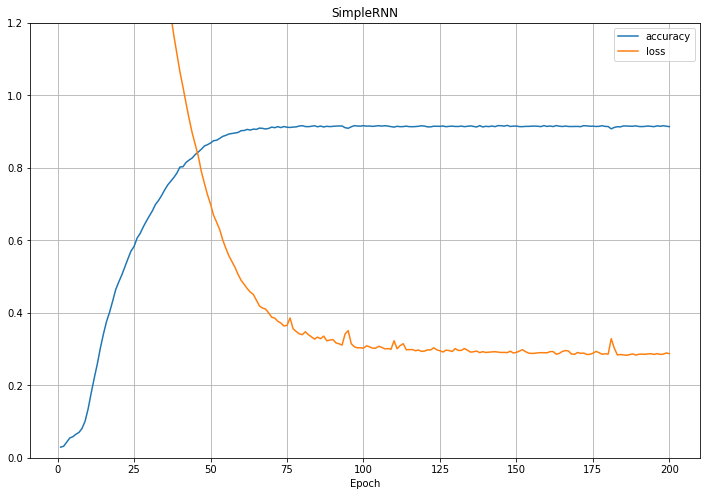

In [47]:
plotting(hist2, 'SimpleRNN' )

#### case 3: `GRU`
- Embedding vector num: 10
- GRU unit num: 128

In [51]:
def model_dch(layers): 
  model = Sequential([
                    Embedding(vocab_size, 10, input_length=max_len-1),
                    layers(128),
                    Dense(vocab_size, activation='softmax')
  ])
  model.summary()

  model.compile('adam', 'categorical_crossentropy', ['accuracy'])

  %time hist = model.fit(X, Y, epochs=200, verbose=1)
  print(hist.history['accuracy'][-1]) # 정확도 확인 

In [52]:
model_dch(GRU)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 23, 10)            34940     
                                                                 
 gru (GRU)                   (None, 128)               53760     
                                                                 
 dense_2 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 539,426
Trainable params: 539,426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
244/244 [==============================] - 3s 8ms/step - loss: 7.6634 - accuracy: 0.0300
Epoch 2/200
244/244 [==============================] - 1s 5ms/step - loss: 7.0971 - accuracy: 0.0341
Epoch 3/200
244/244 [==============================] - 1s 6ms/step - loss: 6.8730 - accuracy: 0.0490
Epoch 4/2

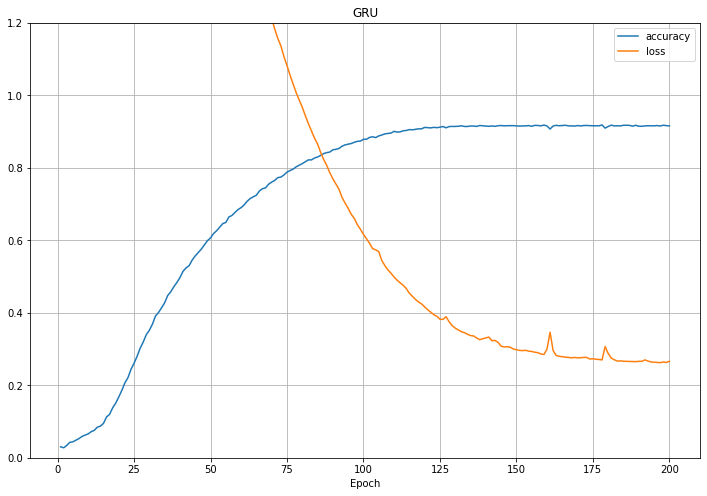

In [53]:
plotting(hist, 'GRU')